In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [38]:
X = np.array([[9.22, 17.14, 9.52, 14.36],
             [4.5, 31.09, 6.36, 18.83],
             [6.25, 20.17, 7.19, 11.91],
             [10.3, 35.06, 9.85, 13.25]])

Y = np.array([[80.15], [27.34], [54.35], [63.66]])

<function matplotlib.pyplot.show(close=None, block=None)>

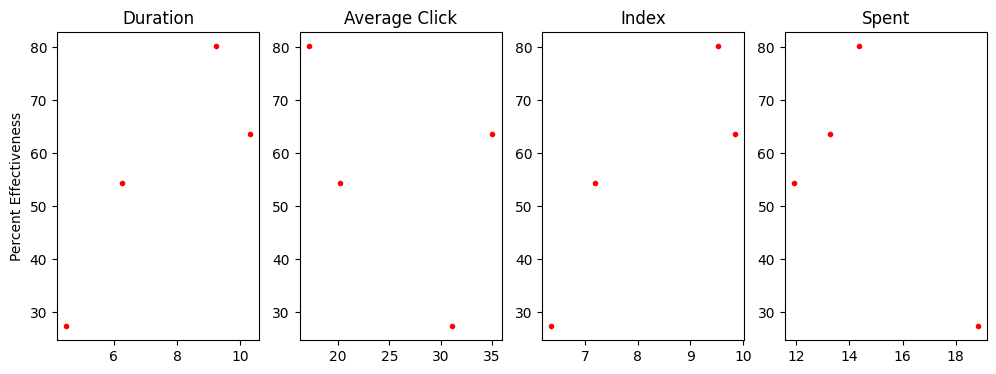

In [39]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(141)
ax1.plot(X[:,0], Y, "r.")
plt.title("Duration")
plt.ylabel("Percent Effectiveness")

ax2 = f.add_subplot(142)
ax2.plot(X[:,1], Y, "r.")
plt.title("Average Click")

ax3 = f.add_subplot(143)
ax3.plot(X[:,2], Y, "r.")
plt.title("Index")

ax4 = f.add_subplot(144)
ax4.plot(X[:,3], Y, "r.")
plt.title("Spent")

plt.show

In [84]:
def cost_function(x, y, w, b, lambda_):
   
    m,n = x.shape 
    cost = 0

    for i in range(m):
        f_wb = w @ x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    w_sum = 0
    for j in range(n):
        w_j2 = w[j]**2
        w_sum += w_j2

    total_cost = 1 / (2 * m) * (cost + lambda_ * w_sum)

    return total_cost

In [77]:
def cost_grad(x, y, w, b, lambda_):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        f_wb_i = w @ x[i] + b         #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
    for k in range(n):
        dj_dw[k] = dj_dw[k] + (lambda_/m) * w[k]

    return dj_db, dj_dw

In [80]:
import math
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    # number of training examples
    m = len(X)
    lambda_ = 1
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<200000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print("Iteration {:4}: Cost {:8.2f}   ".format(i, float(J_history[-1])))
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [93]:
initial_w = np.array([0,0,0,0])
initial_b = 0

# Some gradient descent settings
iterations = 150000
alpha = 0.001

w,b, J_history,w_hostory = gradient_descent(X ,Y, initial_w, initial_b, 
                                   cost_function, cost_grad, alpha, iterations, lambda_=1)

print("w = {} , b = {}".format(w, b))

Iteration    0: Cost   341.05   
Iteration 15000: Cost     8.13   
Iteration 30000: Cost     7.24   
Iteration 45000: Cost     6.57   
Iteration 60000: Cost     6.06   
Iteration 75000: Cost     5.67   
Iteration 90000: Cost     5.38   
Iteration 105000: Cost     5.22   
Iteration 120000: Cost     5.22   
Iteration 135000: Cost     5.22   
Iteration 149999: Cost     5.22   
w = [ 4.53944132 -1.25718091  3.86059111 -0.1315223 ] , b = [24.6100821]


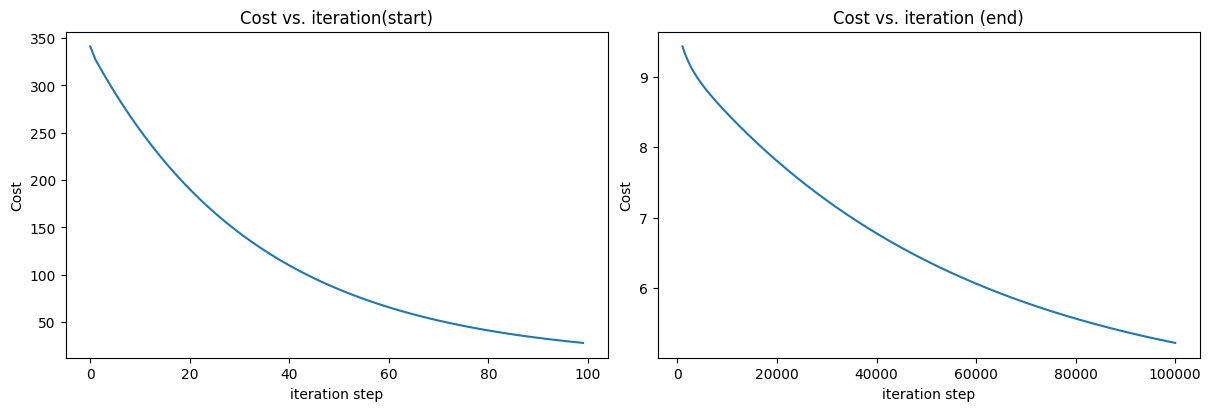

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.coef_, lin_reg.intercept_


(array([[ 4.88372265, -1.29099709,  3.40312446, -0.22271732]]),
 array([28.05024308]))

In [96]:
x_test = np.array([[4.13, 15.4, 13.87, 14.53], [6.14, 20.3, 15.99, 21.15]])

y_predict_man = x_test @ w + b
y_predict_sklearn = lin_reg.predict(x_test)
delta = np.abs(y_predict_man - y_predict_sklearn.reshape(1,2))

print("The prediction result using manual method is {}, than compare to sklearn {}, there is {} value in difference".format(y_predict_man, y_predict_sklearn, delta))


The prediction result using manual method is [75.63276835 85.91063445], than compare to sklearn [[72.30391608]
 [81.53454807]], the is [[3.32885226 4.37608638]] value in difference
